    KNN usable both for classification and regression. 
    KNN  makes no assumption about the structure of the data.
    
    K = 1, the prediction is sensitive to noise, outliers, mislabeled data, and other sources of variation in individual data points (unstable predictions). Risk of overfitting increases.
    K Large ==> the areas assigned to different classes are smoother and not as fragmented and more robust to noise in the individual points. Results in classification boundaries that are less detailed.
    
    A KNN approach can be a reasonable baseline against what you can compare more sophisticated methods.

    Computationally expensive alg (with large dataset size and / or feature count)
    Alternatives to KNN models to be considered, especially if the data is sparse ( = most features are zero).

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from sklearn.datasets import load_iris
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


from matplotlib.colors import ListedColormap

#from adspy_shared_utilities import plot_feature_importances
#from adspy_shared_utilities import plot_decision_tree
#from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

from adspy_shared_utilities import plot_fruit_knn


    FRUIT DATASET


In [2]:
# fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
print (pd.DataFrame(fruits).info())

# For this example, we use the mass, width, and height features of each fruit instance
feature_names_fruits = ['mass', 'width', 'height']
#feature_names_fruits = ['height', 'width', 'mass', 'color_score']

# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
print (lookup_fruit_name)


X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']

print (X_fruits.head())
print(y_fruits.head())

target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']


# default is 75% / 25% train-test split
X_train_fruit, X_test_fruit, y_train_fruit, y_test_fruit = train_test_split(X_fruits, y_fruits, random_state=0)
#X_train_fruit, X_test_fruit, y_train_fruit, y_test_fruit = train_test_split(X_fruits.values,y_fruits.values, random_state = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB
None
{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}
   mass  width  height
0   192    8.4     7.3
1   180    8.0     6.8
2   176    7.4     7.2
3    86    6.2     4.7
4    84    6.0     4.6
0    1
1    1
2    1
3    2
4    2
Name: fruit_label, dtype: int64


In [3]:
iris = load_iris()
print(pd.DataFrame(iris.data).info())
print (iris.keys())

print (pd.DataFrame(iris.data).head())
print (pd.DataFrame(iris.target).head())

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris.data, 
                                                                        iris.target, 
                                                                        random_state = 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
   0
0  0
1  0
2  0
3  0
4  0


# KNN CLASSIFICATION

# FRUIT DATASET

In [4]:
clf = KNeighborsClassifier(n_neighbors = 3)

print ("---------------------------------------------")
print ("Classifier parameters")
print (clf.get_params(deep = True))
print ("---------------------------------------------")

clf.fit(X_train_fruit, y_train_fruit)
#clf.fit(X_train_fruit.values, y_train_fruit)

print('KNN, Fruit dataset')
print('Accuracy of KNNClassifier on training set: {:.2f}'
     .format(clf.score(X_train_fruit, y_train_fruit)))
print('Accuracy of KNNClassifier  on test set: {:.2f}'
     .format(clf.score(X_test_fruit, y_test_fruit)))

---------------------------------------------
Classifier parameters
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
---------------------------------------------
KNN, Fruit dataset
Accuracy of KNNClassifier on training set: 0.82
Accuracy of KNNClassifier  on test set: 0.53


<IPython.core.display.Javascript object>


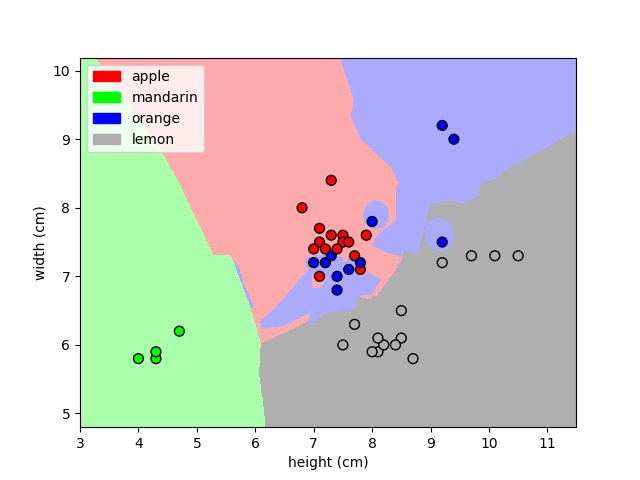

In [5]:
plot_fruit_knn(X_train_fruit, y_train_fruit, 3, 'distance')   
#plot_fruit_knn(X_train_fruit, y_train_fruit, 3, 'uniform')   

    PREDICTION EXAMPLE


In [6]:
my_fruit = pd.DataFrame([20, 4.3, 5.5]).T
my_fruit.columns = feature_names_fruits
fruit_prediction = clf.predict(my_fruit)
print ("Prediction: ", lookup_fruit_name[fruit_prediction[0]])


Prediction:  mandarin


In [7]:
# predict method of KNN classifier expects a numpy array of the test set, not a dataframe!
X_test_fruit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 26 to 33
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mass    15 non-null     int64  
 1   width   15 non-null     float64
 2   height  15 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 480.0 bytes


In [8]:
predictions = clf.predict(X_test_fruit.values)
predictions

/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([3, 1, 4, 4, 1, 1, 1, 3, 3, 4, 2, 1, 3, 1, 4])

# IRIS DATASET

In [9]:
clf = KNeighborsClassifier(n_neighbors = 3)

print ("---------------------------------------------")
print ("Classifier parameters")
print (clf.get_params(deep = True))
print ("---------------------------------------------")

clf.fit(X_train_iris, y_train_iris)

print('KNN, Fruit dataset')
print('Accuracy of KNNClassifier on training set: {:.2f}'
     .format(clf.score(X_train_iris, y_train_iris)))
print('Accuracy of KNNClassifier  on test set: {:.2f}'
     .format(clf.score(X_test_iris, y_test_iris)))

---------------------------------------------
Classifier parameters
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
---------------------------------------------
KNN, Fruit dataset
Accuracy of KNNClassifier on training set: 0.96
Accuracy of KNNClassifier  on test set: 0.95


In [10]:
predictions = clf.predict(X_test_iris)
predictions

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0])

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
setosa_train_X = X_train_iris[y_train_iris==0]
setosa_train_y = y_train_iris[y_train_iris==0]
versicolor_train_X = X_train_iris[y_train_iris==1]
versicolor_train_y = y_train_iris[y_train_iris==1]
virginica_train_X = X_train_iris[y_train_iris==2]
virginica_train_y = y_train_iris[y_train_iris==2]

setosa_test_X = X_test_iris[y_test_iris==0]
setosa_test_y = y_test_iris[y_test_iris==0]
versicolor_test_X = X_test_iris[y_test_iris==1]
versicolor_test_y = y_test_iris[y_test_iris==1]
virginica_test_X = X_test_iris[y_test_iris==2]
virginica_test_y = y_test_iris[y_test_iris==2]

# Find the training and testing accuracies by target value (i.e. malignant, benign)
scores_iris = [clf.score(setosa_train_X, setosa_train_y), 
          clf.score(versicolor_train_X, versicolor_train_y),
          clf.score(virginica_train_X, virginica_train_y),
          clf.score(setosa_test_X, setosa_test_y), 
          clf.score(versicolor_test_X, versicolor_test_y), 
          clf.score(virginica_test_X, virginica_test_y)]

In [13]:
def accuracy_plot_iris(scores):
    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(6), 
                   scores, 
                   color=['#4c72b0','#4c72b0','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3,4,5], ['Setosa\nTraining', 'Versicolor\nTraining', 'Virginica\nTraining','Setosa\nTest', 'Versicolor\nTest', 'Virginica\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Setosa, Versicolor and Virginica iris species', alpha=0.8)

<IPython.core.display.Javascript object>


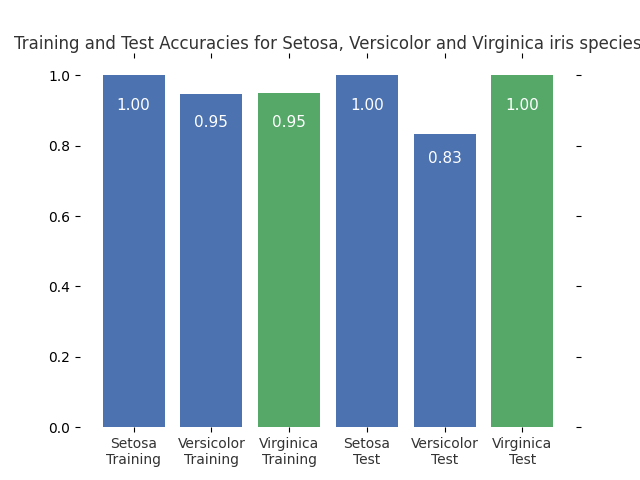

In [14]:
accuracy_plot_iris(scores_iris)

---
 # REAL WORLD DATASET: BREAST CANCER 
    
---

In [15]:
from sklearn.datasets import load_breast_cancer
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
print ("Type of data structure: ", type(cancer))
print ("Keys: ", cancer.keys())
print ("Feature names: ", cancer["feature_names"])

# convert to dataframe
cancerdf = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancerdf['target'] = pd.Series(cancer.target)
counts = cancerdf.target.value_counts(ascending=True)
counts.index = "malignant benign".split()
print ("Distribution of labelled samples: ")
print(counts)
print ("-------------------------------------------")
print (cancerdf.head(5))

Type of data structure:  <class 'sklearn.utils.Bunch'>
Keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Feature names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Distribution of labelled samples: 
malignant    212
benign       357
Name: target, dtype: int64
-------------------------------------------
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.8

In [16]:
X_train_BC, X_test_BC, y_train_BC, y_test_BC = train_test_split(X_cancer, y_cancer, random_state = 0)

In [17]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_BC, y_train_BC)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(clf.score(X_train_BC, y_train_BC)))
print('Accuracy of KNN classifier on test set: {:.2f}\n'
     .format(clf.score(X_test_BC, y_test_BC)))


predictions = clf.predict(X_test_BC)
print("no cancer: {0}".format(len(predictions[predictions==0])))
print("cancer: {0}".format(len(predictions[predictions==1])))

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of KNN classifier on training set: 1.00
Accuracy of KNN classifier on test set: 0.92

no cancer: 51
cancer: 92


In [18]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_BC, y_train_BC)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(clf.score(X_train_BC, y_train_BC)))
print('Accuracy of KNN classifier on test set: {:.2f}\n'
     .format(clf.score(X_test_BC, y_test_BC)))

predictions = clf.predict(X_test_BC)
print("no cancer: {0}".format(len(predictions[predictions==0])))
print("cancer: {0}".format(len(predictions[predictions==1])))

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of KNN classifier on training set: 0.96
Accuracy of KNN classifier on test set: 0.92

no cancer: 54
cancer: 89


In [19]:
mal_train_X = X_train_BC[y_train_BC==0]
mal_train_y = y_train_BC[y_train_BC==0]
ben_train_X = X_train_BC[y_train_BC==1]
ben_train_y = y_train_BC[y_train_BC==1]

mal_test_X = X_test_BC[y_test_BC==0]
mal_test_y = y_test_BC[y_test_BC==0]
ben_test_X = X_test_BC[y_test_BC==1]
ben_test_y = y_test_BC[y_test_BC==1]

# Find the training and testing accuracies by target value (i.e. malignant, benign)
scores = [clf.score(mal_train_X, mal_train_y), 
          clf.score(ben_train_X, ben_train_y),
          clf.score(mal_test_X, mal_test_y), 
          clf.score(ben_test_X, ben_test_y)]

In [20]:
def accuracy_plot(scores):
    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

<IPython.core.display.Javascript object>


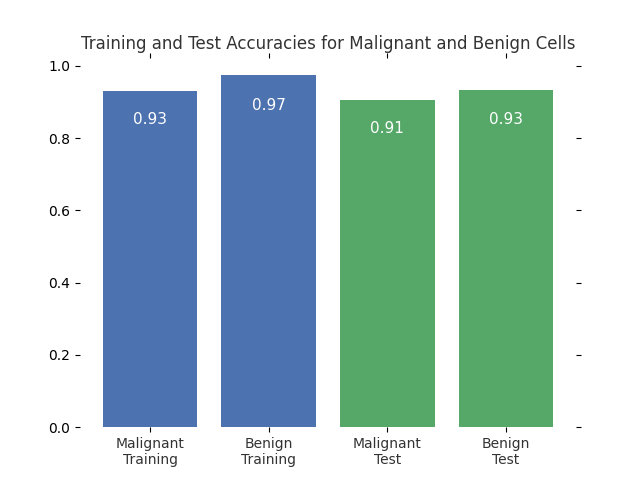

In [21]:
accuracy_plot(scores) 

---
EVALUATION: train-test accuracy as a function of K
---

<IPython.core.display.Javascript object>


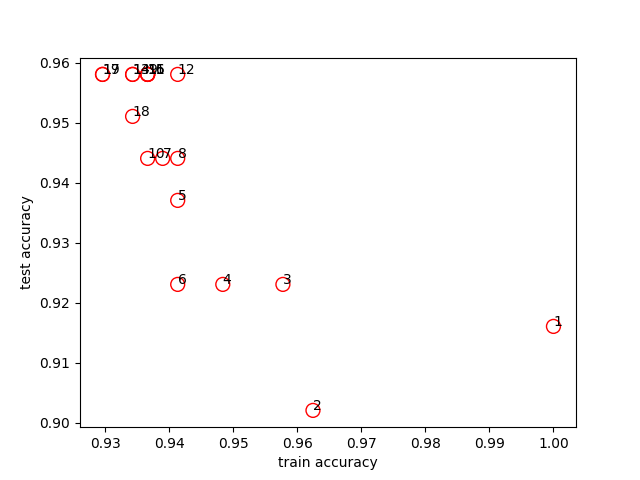

---------------------
[1.0, 0.9624413145539906, 0.9577464788732394, 0.9483568075117371, 0.9413145539906104, 0.9413145539906104, 0.9389671361502347, 0.9413145539906104, 0.9366197183098591, 0.9366197183098591, 0.9366197183098591, 0.9413145539906104, 0.9342723004694836, 0.9342723004694836, 0.9366197183098591, 0.9366197183098591, 0.9295774647887324, 0.9342723004694836, 0.9295774647887324]
[0.916083916083916, 0.9020979020979021, 0.9230769230769231, 0.9230769230769231, 0.9370629370629371, 0.9230769230769231, 0.9440559440559441, 0.9440559440559441, 0.958041958041958, 0.9440559440559441, 0.958041958041958, 0.958041958041958, 0.958041958041958, 0.958041958041958, 0.958041958041958, 0.958041958041958, 0.958041958041958, 0.951048951048951, 0.958041958041958]


In [22]:
k_range = range(1,20)

train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_BC, y_train_BC)
    train_scores.append(knn.score(X_train_BC, y_train_BC))
    test_scores.append(knn.score(X_test_BC, y_test_BC))

plt.figure()
#plt.xlabel('k')
plt.xlabel('train accuracy')
plt.ylabel('test accuracy')
#plt.scatter(k_range, scores)
plt.scatter(train_scores, test_scores, s= 100, facecolors='none', edgecolors='r')
#plt.xticks([0,.2,.4,.6,.8, 1]);
#plt.yticks([0,.2,.4,.6,.8, 1]);

for i, label in enumerate(k_range):
    plt.annotate(label, (train_scores[i], test_scores[i]))

print ("---------------------")
print (train_scores)
print(test_scores)


